Part 1:

Download the file data.txt from the Moodle web page (right click and “save link as” or similar). Use principal component analysis to map the data to 2 dimensions, visualize the data as scatter plot (you can re-use code for exercise 2). How many clusters can you identify from the data just by looking at the visualization?


In [6]:
# importing necessary modules
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np

# Loading data
X = np.loadtxt('data.txt', dtype=np.float, delimiter=',')

# Dimensionally reduction using PCA
scaler = preprocessing.StandardScaler().fit(X)
X_transformed = scaler.transform(X)
pca = PCA(n_components=2).fit(X)
X_pca= pca.transform(X)

In [7]:
# Checking for the change in shape

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

('original shape:   ', (500L, 10L))
('transformed shape:', (500L, 2L))


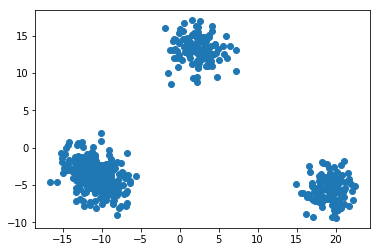

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], cmap='viridis')

Part 2:

Run K-means clustering on the data for different values of K (use the original 10-dimensional data as input to K-means, not the PCA projection). Select the number K for which the clustering has the maximal Silhouette Score. Color the scatter plot of the PCA projection so that members of each cluster are colored differently.
Did you end up with the same clustering of the data as you did based on visual inspection of the PCA plot? If no, do you known which clustering captures the true structure of the data better?


In [25]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)
kmean.fit(X)
y_kmean=kmean.predict(X)

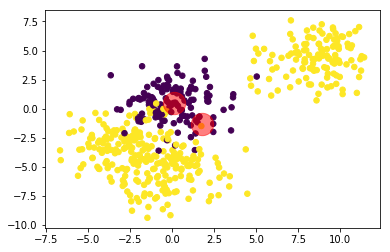

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmean, s=30, cmap='viridis')
centers=kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=0.5);

In [15]:
kmean.labels_

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

sl =  silhouette_score(X, y_kmean)
print sl

0.49884221944224205


In [35]:
np.amax(sample_silhouette_values)

0.8146754150651211

Part 3:

Load the Iris data set used in Exercise 2.  Visualize the data with scatter plot of 2-dimensional PCA projection, color each species separately (same picture as in Exercise 2). Remove the true species column, and pretend from now on that you do not know it.


In [47]:
X = np.loadtxt('iris.data', dtype=np.float, usecols=[0,1,2,3], delimiter=',')
y = np.loadtxt('iris.data', dtype=np.str, usecols = 4, delimiter=',')
scaler = preprocessing.StandardScaler().fit(X)
X_transformed = scaler.transform(X)
pca = PCA(n_components=2).fit(X)
X_pca= pca.transform(X)


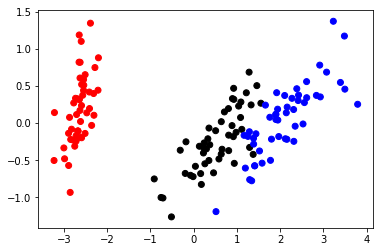

In [48]:
my_colormap = {"Iris-setosa":"red", "Iris-virginica":"blue", "Iris-versicolor":"black"}
colors = [my_colormap[a] for a in y]
plt.scatter(X_pca[:,0], X_pca[:,1], color=colors)